# Import Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing/Homework   Projects/Assignment/Assignment Day 29 - Exploring Other Machine Learning Models With Python (Unsupervised) Part II/Dataset/flight.csv')
pd.set_option('display.max_columns', None)
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Observations:
- There are 62988 total of rows on the dataset.
- There are missing values on several features. Will check later below.
- We don't need MEMBER_NO because that column contains unique values and won't be useful.
- There are features that need to be converted to Datetime format, such as FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE.
- Feature AGE needs to be converted to int64.

In [ ]:
df = df.drop(columns=['MEMBER_NO'])

In [ ]:
df

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,2,0,0.0,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,4,0,0.0,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,2,0,0.0,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,2,0,0.0,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


## Feature Explanation



*   MEMBER_NO = ID Member
*   FFP_DATE = Frequent Flyer Program Join Date
*   FIRST_FLIGHT_DATE = First flight date
*   GENDER = Gender
*   FFP_TIER = Tier dari Frequent Flyer Program
*   WORK_CITY = Kota Asal
*   WORK_PROVINCE = Provinsi Asal
*   WORK_COUNTRY = Negara Asal
*   AGE = Umur Customer
*   LOAD_TIME = Tanggal data diambil
*   FLIGHT_COUNT = Jumlah penerbangan Customer
*   BP_SUM = Rencana Perjalanan
*   SUM_YR_1 = Total credit/point di tahun pertama
*   SUM_YR_2 = Total credit/point di tahun kedua
*   SEG_KM_SUM = Total jarak(km) penerbangan yg sudah dilakukan
*   LAST_FLIGHT_DATE = Tanggal penerbangan terakhir
*   LAST_TO_END = The last flight time to the end of the observation window
*   AVG_INTERVAL = Rata-rata jarak waktu
*   MAX_INTERVAL = Maksimal jarak waktu
*   EXCHANGE_COUNT = Jumlah penukaran
*   avg_discount = Rata rata discount yang didapat customer
*   Points_Sum = Jumlah poin yang didapat customer
*   Point_NotFlight = Point yang tidak digunakan oleh members



# Missing Values Handling

## Observation

In [ ]:
df.isna().sum()

FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
missing_pct = df.isnull().sum() * 100 / len(df)
pd.DataFrame({'Missing value percentage': missing_pct})

,Missing value percentage
FFP_DATE,0.000000
FIRST_FLIGHT_DATE,0.000000
GENDER,0.004763
FFP_TIER,0.000000
WORK_CITY,3.602273
WORK_PROVINCE,5.156538
WORK_COUNTRY,0.041278
AGE,0.666794
LOAD_TIME,0.000000
FLIGHT_COUNT,0.000000


In [ ]:
df[['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


Observations:

There are some features with missing values.

Categorical Features: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY

Numerical Features: AGE, SUM_YR_1, SUM_YR_2

Decisions:
- We will drop WORK_CITY, WORK_PROVINCE, WORK_COUNTRY as they have many unique categorical features and we won't need them for our clustering project.
- We will replace the missing values of GENDER with the most frequent value.
- We will replace the missing values of AGE, SUM_YR_1, SUM_YR_2 with median.

## Handling

In [ ]:
df = df.drop(columns=['WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY'])

In [ ]:
df.head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])

In [ ]:
print('Total missing value of GENDER: ', df['GENDER'].isna().sum())

Total missing value of GENDER:  0


In [ ]:
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [ ]:
print('Total missing value of AGE: ', df['AGE'].isna().sum())
print('Total missing value of SUM_YR_1: ', df['SUM_YR_1'].isna().sum())
print('Total missing value of SUM_YR_2: ', df['SUM_YR_2'].isna().sum())

Total missing value of AGE:  0
Total missing value of SUM_YR_1:  0
Total missing value of SUM_YR_2:  0


All clear.

# Duplicate Values Handling

## Observation

In [ ]:
print('Total duplicate data: ', df.duplicated().sum())

Total duplicate data:  1


In [ ]:
df[df.duplicated(keep=False)].head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
49070,8/11/2012,8/11/2012,Male,4,40.0,3/31/2014,2,1841,2401.0,0.0,4844,8/18/2012,592,7.0,7,0,0.600021,1841,0
49085,8/11/2012,8/11/2012,Male,4,40.0,3/31/2014,2,1841,2401.0,0.0,4844,8/18/2012,592,7.0,7,0,0.600021,1841,0


There is 1 duplicate data.

## Handling

In [ ]:
df = df.drop_duplicates()

In [ ]:
print('Total duplicate data: ', df.duplicated().sum())

Total duplicate data:  0


All clear.

# Feature Engineering

## Observation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62987 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           62987 non-null  object 
 1   FIRST_FLIGHT_DATE  62987 non-null  object 
 2   GENDER             62987 non-null  object 
 3   FFP_TIER           62987 non-null  int64  
 4   AGE                62987 non-null  float64
 5   LOAD_TIME          62987 non-null  object 
 6   FLIGHT_COUNT       62987 non-null  int64  
 7   BP_SUM             62987 non-null  int64  
 8   SUM_YR_1           62987 non-null  float64
 9   SUM_YR_2           62987 non-null  float64
 10  SEG_KM_SUM         62987 non-null  int64  
 11  LAST_FLIGHT_DATE   62987 non-null  object 
 12  LAST_TO_END        62987 non-null  int64  
 13  AVG_INTERVAL       62987 non-null  float64
 14  MAX_INTERVAL       62987 non-null  int64  
 15  EXCHANGE_COUNT     62987 non-null  int64  
 16  avg_discount       62987 no

In [ ]:
df.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


- The features `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, and `LAST_FLIGHT_DATE` need to be converted to datetime format. Since their values represent dates and their data types are currently objects, we will convert them to datetime.
- The features `SUM_YR_1`, `SUM_YR_2`, and `AGE` need to be converted to int64. Since their values are not decimal numbers, and intuitively, the total credit points (year 1 or 2) and age are not decimal numbers.

## Handling

In [ ]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])

There are 2 errors when i tried to convert `LOAD_TIME` to datetime format. I will explain the error below.

1. **Error 1**

`----> 4 df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])`.

time data "2014/2/29  0:00:00" doesn't match format "%m/%d/%Y", at position 65. You might want to try:

    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

**Explanation:**

**This error occurs due to incorrect date formatting in a row containing** `2014/2/29  0:00:00`.

**To resolve this, we can replace it with the correct format using the following code:**
`df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2/29/2014')`

----

2. **Error 2**

After replacing based on the first error, another error persists:


`----> 1 df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])`

day is out of range for month, at position 65. You might want to try:

    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

**Explanation:**

**This error occurs because 2014 is not a leap year. Since 2014 is not a leap year, February 29, 2014, is not a valid date in the commonly used calendar. Python automatically identifies this error when we convert it into datetime. It is not a wise decision to drop those rows because there are many of them. So, here will convert February 29, 2014 to February 28, 2014**

In [ ]:
# Here is the rows of data of incorrect date formatting output:
# Doesn't match format "%m/%d/%Y"

df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,2007-06-17,2007-06-17,Female,6,46.0,2014-03-31,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,2009-08-26,2010-04-29,Male,5,70.0,2014-03-31,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,2006-11-10,2007-01-26,Male,5,39.0,2014-03-31,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,2005-07-13,2005-08-06,Male,5,40.0,2014-03-31,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,2006-05-24,2007-04-21,Male,5,50.0,2014-03-31,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,2013-01-11,2013-07-10,Male,4,23.0,2014-03-31,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,2009-07-26,2009-07-26,Male,4,37.0,2014-03-31,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,2011-04-11,2011-04-20,Male,4,34.0,2014-03-31,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,2007-10-31,2008-03-13,Male,4,42.0,2014-03-31,2,276,0.0,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [ ]:
df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00'].shape

(421, 19)

There are 421 rows with incorrect dates.

We will replace them all with the correct format with:
- "%m/%d/%Y"
- 29 February, 2014 to 28 February, 2014

In [ ]:
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2/28/2014')

In [ ]:
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

In [ ]:
df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00'].shape

(0, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62987 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62987 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62987 non-null  datetime64[ns]
 2   GENDER             62987 non-null  object        
 3   FFP_TIER           62987 non-null  int64         
 4   AGE                62987 non-null  float64       
 5   LOAD_TIME          62987 non-null  datetime64[ns]
 6   FLIGHT_COUNT       62987 non-null  int64         
 7   BP_SUM             62987 non-null  int64         
 8   SUM_YR_1           62987 non-null  float64       
 9   SUM_YR_2           62987 non-null  float64       
 10  SEG_KM_SUM         62987 non-null  int64         
 11  LAST_FLIGHT_DATE   62987 non-null  datetime64[ns]
 12  LAST_TO_END        62987 non-null  int64         
 13  AVG_INTERVAL       62987 non-null  float64       
 14  MAX_INTERVA

In [ ]:
df.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,2007-02-19,2007-08-03,Male,6,42.0,2014-03-31,140,362480,171483.0,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,2007-02-01,2007-08-30,Male,6,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26


All seems good, we are good to continue.

In [ ]:
df['AGE'] = df['AGE'].astype(int)
df['SUM_YR_1'] = df['SUM_YR_1'].astype(int)
df['SUM_YR_2'] = df['SUM_YR_2'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62987 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62987 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62987 non-null  datetime64[ns]
 2   GENDER             62987 non-null  object        
 3   FFP_TIER           62987 non-null  int64         
 4   AGE                62987 non-null  int64         
 5   LOAD_TIME          62987 non-null  datetime64[ns]
 6   FLIGHT_COUNT       62987 non-null  int64         
 7   BP_SUM             62987 non-null  int64         
 8   SUM_YR_1           62987 non-null  int64         
 9   SUM_YR_2           62987 non-null  int64         
 10  SEG_KM_SUM         62987 non-null  int64         
 11  LAST_FLIGHT_DATE   62987 non-null  datetime64[ns]
 12  LAST_TO_END        62987 non-null  int64         
 13  AVG_INTERVAL       62987 non-null  float64       
 14  MAX_INTERVA

In [ ]:
df.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,31,2014-03-31,210,505308,239560,234188,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,2007-02-19,2007-08-03,Male,6,42,2014-03-31,140,362480,171483,167434,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,2007-02-01,2007-08-30,Male,6,40,2014-03-31,135,351159,163618,164982,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26


# Outlier Handling

## Observation

In [ ]:
numerical = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
             'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL',
             'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum',
             'Point_NotFlight']
categorical = list(set(df.columns) - set(numerical))

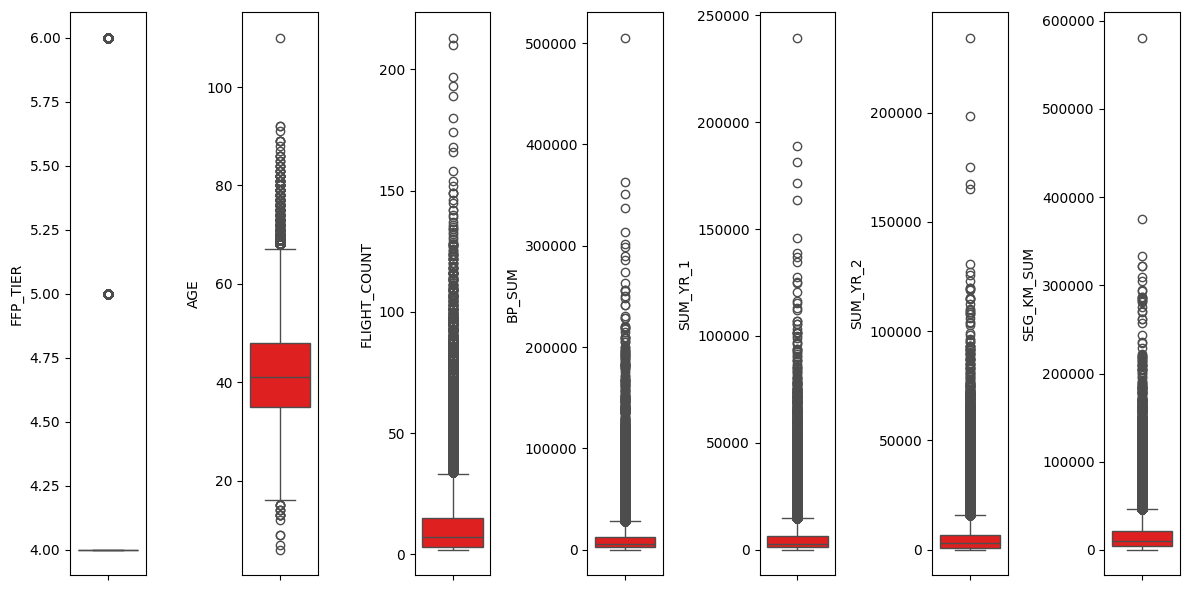

In [ ]:
plt.figure(figsize=(12,6))

features_1 = numerical[:7]
features_2 = numerical[7:]

for i in range(0, len(features_1)):
    plt.subplot(1, len(features_1), i+1)
    sns.boxplot(y=df[features_1[i]], color='red')
    plt.tight_layout()

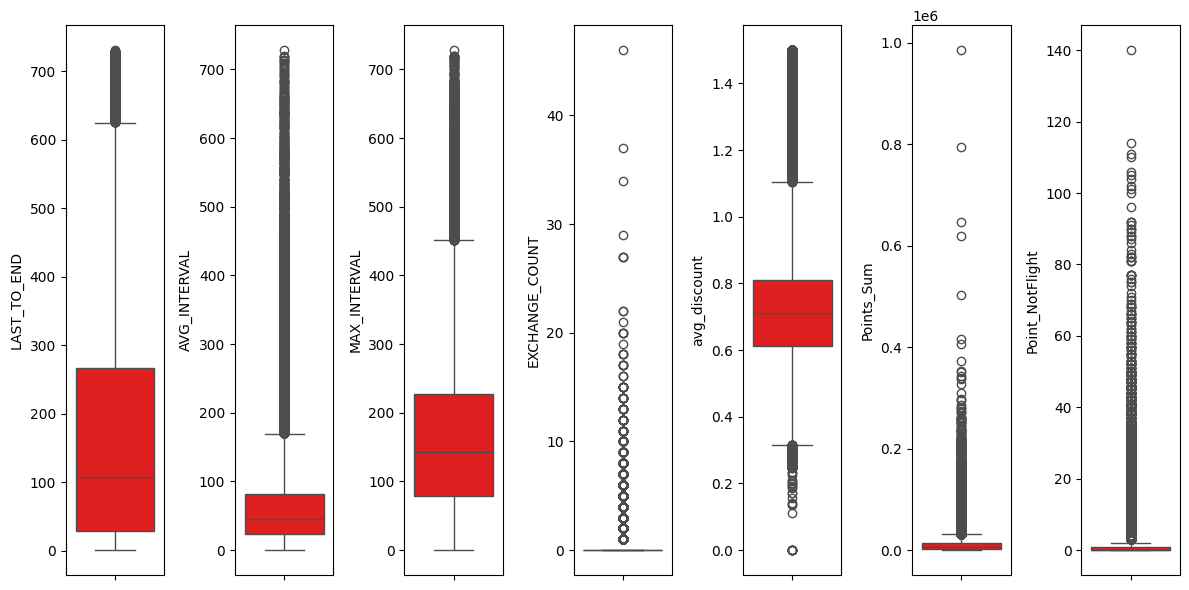

In [ ]:
plt.figure(figsize=(12,6))

for i in range(0, len(features_2)):
    plt.subplot(1, len(features_2), i+1)
    sns.boxplot(y=df[features_2[i]], color='red')
    plt.tight_layout()

- From the box plot above, it can be observed that there are numerous outliers detected. However, the majority of these outliers represent the characteristics of the population in the dataset (also known as "true outliers"). Therefore, in this case, I will only drop outliers that are extremely deviant.

Outliers removal:
- 1 row of data with `AGE` > 100, which is 110
- 1 row of data with `BP_SUM` > 400000, which is 505308
- 1 row of data with `SUM_YR_1` > 400000, which is 239560
- 2 rows of data with `SUM_YR_2` > 180000, which are 234188 & 198224
- 1 row of data with `SEG_KM_SUM` > 400000, which is 580717
- 1 row of data with `EXCHANGE_COUNT` > 40, which is 46
- 2 rows of data with `Points_Sum` > 700000, which is 795398 & 985572
- 1 row of data with `Points_NotFlight` > 120, which is 140

All the outliers are stated below.

In [ ]:
df[df['AGE'] > 100]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,2005-04-14,2005-05-18,Female,4,110,2014-03-31,7,10895,6117,2888,14053,2013-04-06,361,50.333333,214,1,0.740881,11194,3


In [ ]:
df[df['BP_SUM'] > 400000]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,31,2014-03-31,210,505308,239560,234188,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50


In [ ]:
df[df['SUM_YR_1'] > 200000]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,31,2014-03-31,210,505308,239560,234188,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50


In [ ]:
df[df['SUM_YR_2'] > 180000]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,31,2014-03-31,210,505308,239560,234188,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
21,2011-06-07,2011-06-09,Male,6,41,2014-03-31,23,255573,46800,198224,214590,2014-03-26,6,32.909091,135,7,1.061631,286520,9


In [ ]:
df[df['SEG_KM_SUM'] > 400000]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,31,2014-03-31,210,505308,239560,234188,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50


In [ ]:
df[df['EXCHANGE_COUNT'] > 40]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
974,2004-11-01,2005-09-11,Male,6,27,2014-03-31,26,62498,25871,43444,74707,2014-03-28,4,25.56,224,46,0.956791,244458,76


In [ ]:
df[df['Points_Sum'] > 700000]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
26,2007-02-01,2007-03-23,Male,6,46,2014-03-31,213,217809,136769,96568,187917,2014-03-29,3,3.433962,37,0,1.146355,795398,49
60984,2012-07-01,2012-09-16,Male,4,45,2014-03-31,3,634,852,401,2695,2014-03-08,24,269.500000,353,22,0.400468,985572,92


In [ ]:
df[df['Point_NotFlight'] > 120]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
1458,2007-02-18,2009-12-15,Male,4,33,2014-03-31,77,49666,38960,17909,94463,2014-03-22,10,9.447368,51,4,0.638325,79732,140


## Handling

In [ ]:
df = df[~(df['AGE'] > 100)]
df = df[~(df['BP_SUM'] > 400000)]
df = df[~(df['SUM_YR_1'] > 200000)]
df = df[~(df['SUM_YR_2'] > 180000)]
df = df[~(df['SEG_KM_SUM'] > 400000)]
df = df[~(df['EXCHANGE_COUNT'] > 40)]
df = df[~(df['Points_Sum'] > 700000)]
df = df[~(df['Point_NotFlight'] > 120)]

We succesfully removed all the extreme outliers. Will do sanity check to make sure all the extreme outliers are removed below.

In [ ]:
df[(df['AGE'] > 100) | (df['BP_SUM'] > 400000) | (df['SUM_YR_1'] > 200000) | (df['SUM_YR_2'] > 180000) | (df['SEG_KM_SUM'] > 400000) | (df['EXCHANGE_COUNT'] > 40) | (df['Points_Sum'] > 700000) | (df['Point_NotFlight'] > 120)]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


No extreme outliers. We are good to continue.

# Exploratory Data Analysis

## Statistical Summary

In [ ]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,62980.0,4.102048,0.373573,4.0,4.000000,4.000000,4.000000,6.0
AGE,62980.0,42.465973,9.850190,6.0,35.000000,41.000000,48.000000,92.0
FLIGHT_COUNT,62980.0,11.832010,14.002532,2.0,3.000000,7.000000,15.000000,197.0
BP_SUM,62980.0,10908.936075,16168.876012,0.0,2518.000000,5700.000000,12827.000000,362480.0
SUM_YR_1,62980.0,5325.803191,8003.431143,0.0,1020.000000,2800.000000,6522.250000,188926.0
SUM_YR_2,62980.0,5589.109035,8604.253858,0.0,785.000000,2773.000000,6825.250000,174895.0
SEG_KM_SUM,62980.0,17107.413226,20811.852775,368.0,4747.000000,9993.500000,21267.500000,375074.0
LAST_TO_END,62980.0,176.126580,183.817613,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62980.0,67.752016,77.516710,0.0,23.370370,44.666667,82.000000,728.0
MAX_INTERVAL,62980.0,166.038488,123.397382,0.0,79.000000,143.000000,228.000000,728.0


In [ ]:
df[categorical].describe().T

,count,mean,min,25%,50%,75%,max
LOAD_TIME,62980,2014-03-31 00:00:00.000000256,2014-03-31,2014-03-31,2014-03-31,2014-03-31,2014-03-31
FFP_DATE,62980,2010-03-07 01:53:24.445855744,2004-11-01,2008-04-12,2010-10-08,2012-03-29,2013-03-31
FIRST_FLIGHT_DATE,62980,2010-09-01 19:34:39.517307392,1905-12-31,2008-12-15,2011-04-23,2012-07-26,2015-05-30
LAST_FLIGHT_DATE,62980,2013-10-07 14:32:09.755477760,2012-04-01,2013-07-08,2013-12-15,2014-03-03,2014-03-31


Based on our observation of the statistical summary, we can identify the following anomalies:

### Anomaly 1

- On the `AGE` column, the minimum value is 6. According to the research we conducted, the majority of airlines have a policy stating that individuals under the age of 15 are not permitted to fly alone, and must be accompanied by a parent/guardian ([Source](https://www.transportation.gov/sites/dot.gov/files/docs/Kids_Fly_Alone.pdf)). Therefore, we will drop rows where AGE < 15, as it is not common practice, and we will not use them for our project.

In [ ]:
print("Number of customer with age less than 15: ", len(df[df['AGE'] < 15]))

Number of customer with age less than 15:  13


In [ ]:
df = df[~(df['AGE'] < 15)]

In [ ]:
print("Number of customer with age less than 15: ", len(df[df['AGE'] < 15]))

Number of customer with age less than 15:  0


There are 13 rows of data with AGE < 15. We have successfully removed them.

### Anomaly 2

- There is an anomaly in the `FIRST_FLIGHT_DATE` column where the minimum value is `1905-12-31`. Upon further investigation, there are 2 rows of data that have this value. The `FFP_DATE` for both of these rows is in the years 2004 and 2011, with ages of 35 and 37, respectively. These two data points are likely system errors because the difference between `FIRST_FLIGHT_DATE` and `FFP_DATE` is nearly 100 years, while their ages are only 35 and 37. Therefore, we will remove both rows of data.

In [ ]:
df[df['FIRST_FLIGHT_DATE'] == '1905-12-31']

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4455,2011-02-27,1905-12-31,Male,4,35,2014-03-31,40,26851,5956,22244,52763,2014-03-14,18,18.051282,92,1,0.688062,33588,27
30099,2004-11-10,1905-12-31,Female,4,37,2014-03-31,8,6366,5385,1907,9592,2013-11-19,134,75.000000,178,1,0.775909,26192,38


In [ ]:
df = df[~(df['FIRST_FLIGHT_DATE'] == '1905-12-31')]

We have succcessfully removed the anomaly data on the `FIRST_FLIGHT_DATE' feature.

### Anomaly 3

- An anomaly has been identified where there are rows of data with the feature FIRST_FLIGHT_DATE exceeding its LOAD_TIME and LAST_FLIGHT_DATE. Logically, this scenario is not possible because FIRST_FLIGHT_DATE must be less than or equal to LAST_FLIGHT_DATE, as LAST_FLIGHT_DATE represents the last registered flight in the database. There are 6 rows of data exhibiting these anomalous characteristics. These 6 rows of data will be removed.

In [ ]:
df[(df['FIRST_FLIGHT_DATE']) > (df['LOAD_TIME'])]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
3293,2008-09-24,2015-03-09,Male,5,47,2014-03-31,25,41312,18347,19595,52083,2014-01-08,84,22.083333,192,1,0.807256,42312,2
3733,2007-06-04,2015-02-15,Male,4,41,2014-03-31,43,33326,14258,22887,63459,2014-03-27,5,17.261905,191,2,0.625447,37979,7
16393,2007-04-01,2015-05-30,Male,4,43,2014-03-31,17,11376,4956,7810,17470,2014-02-17,44,32.312500,102,0,0.845973,11376,0
25240,2006-03-08,2014-07-14,Male,4,38,2014-03-31,11,9113,576,5820,18642,2013-09-15,199,38.700000,175,11,0.504935,647113,13
28231,2011-01-15,2015-04-03,Female,4,48,2014-03-31,8,5502,0,7030,14245,2014-03-24,8,41.571429,128,0,0.570465,5502,0
33198,2006-11-10,2014-09-11,Male,4,48,2014-03-31,2,6540,0,5767,4564,2014-02-09,52,94.000000,94,0,1.410000,6540,0


In [ ]:
df[(df['FIRST_FLIGHT_DATE'] > df['LAST_FLIGHT_DATE'])]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
3293,2008-09-24,2015-03-09,Male,5,47,2014-03-31,25,41312,18347,19595,52083,2014-01-08,84,22.083333,192,1,0.807256,42312,2
3733,2007-06-04,2015-02-15,Male,4,41,2014-03-31,43,33326,14258,22887,63459,2014-03-27,5,17.261905,191,2,0.625447,37979,7
16393,2007-04-01,2015-05-30,Male,4,43,2014-03-31,17,11376,4956,7810,17470,2014-02-17,44,32.312500,102,0,0.845973,11376,0
25240,2006-03-08,2014-07-14,Male,4,38,2014-03-31,11,9113,576,5820,18642,2013-09-15,199,38.700000,175,11,0.504935,647113,13
28231,2011-01-15,2015-04-03,Female,4,48,2014-03-31,8,5502,0,7030,14245,2014-03-24,8,41.571429,128,0,0.570465,5502,0
33198,2006-11-10,2014-09-11,Male,4,48,2014-03-31,2,6540,0,5767,4564,2014-02-09,52,94.000000,94,0,1.410000,6540,0


In [ ]:
df = df[~(df['FIRST_FLIGHT_DATE'] > df['LAST_FLIGHT_DATE'])]

In [ ]:
df[(df['FIRST_FLIGHT_DATE'] > df['LAST_FLIGHT_DATE'])]

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [ ]:
 df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,62959.0,4.102051,0.373597,4.0,4.000000,4.000000,4.000000,6.0
AGE,62959.0,42.472403,9.841573,15.0,35.000000,41.000000,48.000000,92.0
FLIGHT_COUNT,62959.0,11.831398,14.002557,2.0,3.000000,7.000000,15.000000,197.0
BP_SUM,62959.0,10907.855398,16169.588644,0.0,2518.000000,5700.000000,12823.500000,362480.0
SUM_YR_1,62959.0,5325.739338,8004.175919,0.0,1020.000000,2800.000000,6522.000000,188926.0
SUM_YR_2,62959.0,5588.272225,8604.133903,0.0,785.000000,2773.000000,6824.000000,174895.0
SEG_KM_SUM,62959.0,17105.690894,20812.380120,368.0,4747.000000,9993.000000,21261.500000,375074.0
LAST_TO_END,62959.0,176.133706,183.821854,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62959.0,67.751847,77.515875,0.0,23.375000,44.666667,82.000000,728.0
MAX_INTERVAL,62959.0,166.039121,123.391207,0.0,79.000000,143.000000,228.000000,728.0


In [ ]:
df[categorical].describe().T

,count,mean,min,25%,50%,75%,max
LOAD_TIME,62959,2014-03-31 00:00:00.000000000,2014-03-31,2014-03-31 00:00:00,2014-03-31,2014-03-31,2014-03-31
FFP_DATE,62959,2010-03-07 03:31:53.187947776,2004-11-01,2008-04-12 00:00:00,2010-10-08,2012-03-29,2013-03-31
FIRST_FLIGHT_DATE,62959,2010-09-02 20:09:33.859178496,2004-11-03,2008-12-14 12:00:00,2011-04-23,2012-07-26,2014-03-30
LAST_FLIGHT_DATE,62959,2013-10-07 14:21:54.569799424,2012-04-01,2013-07-08 00:00:00,2013-12-15,2014-03-03,2014-03-31


## KDE Plot

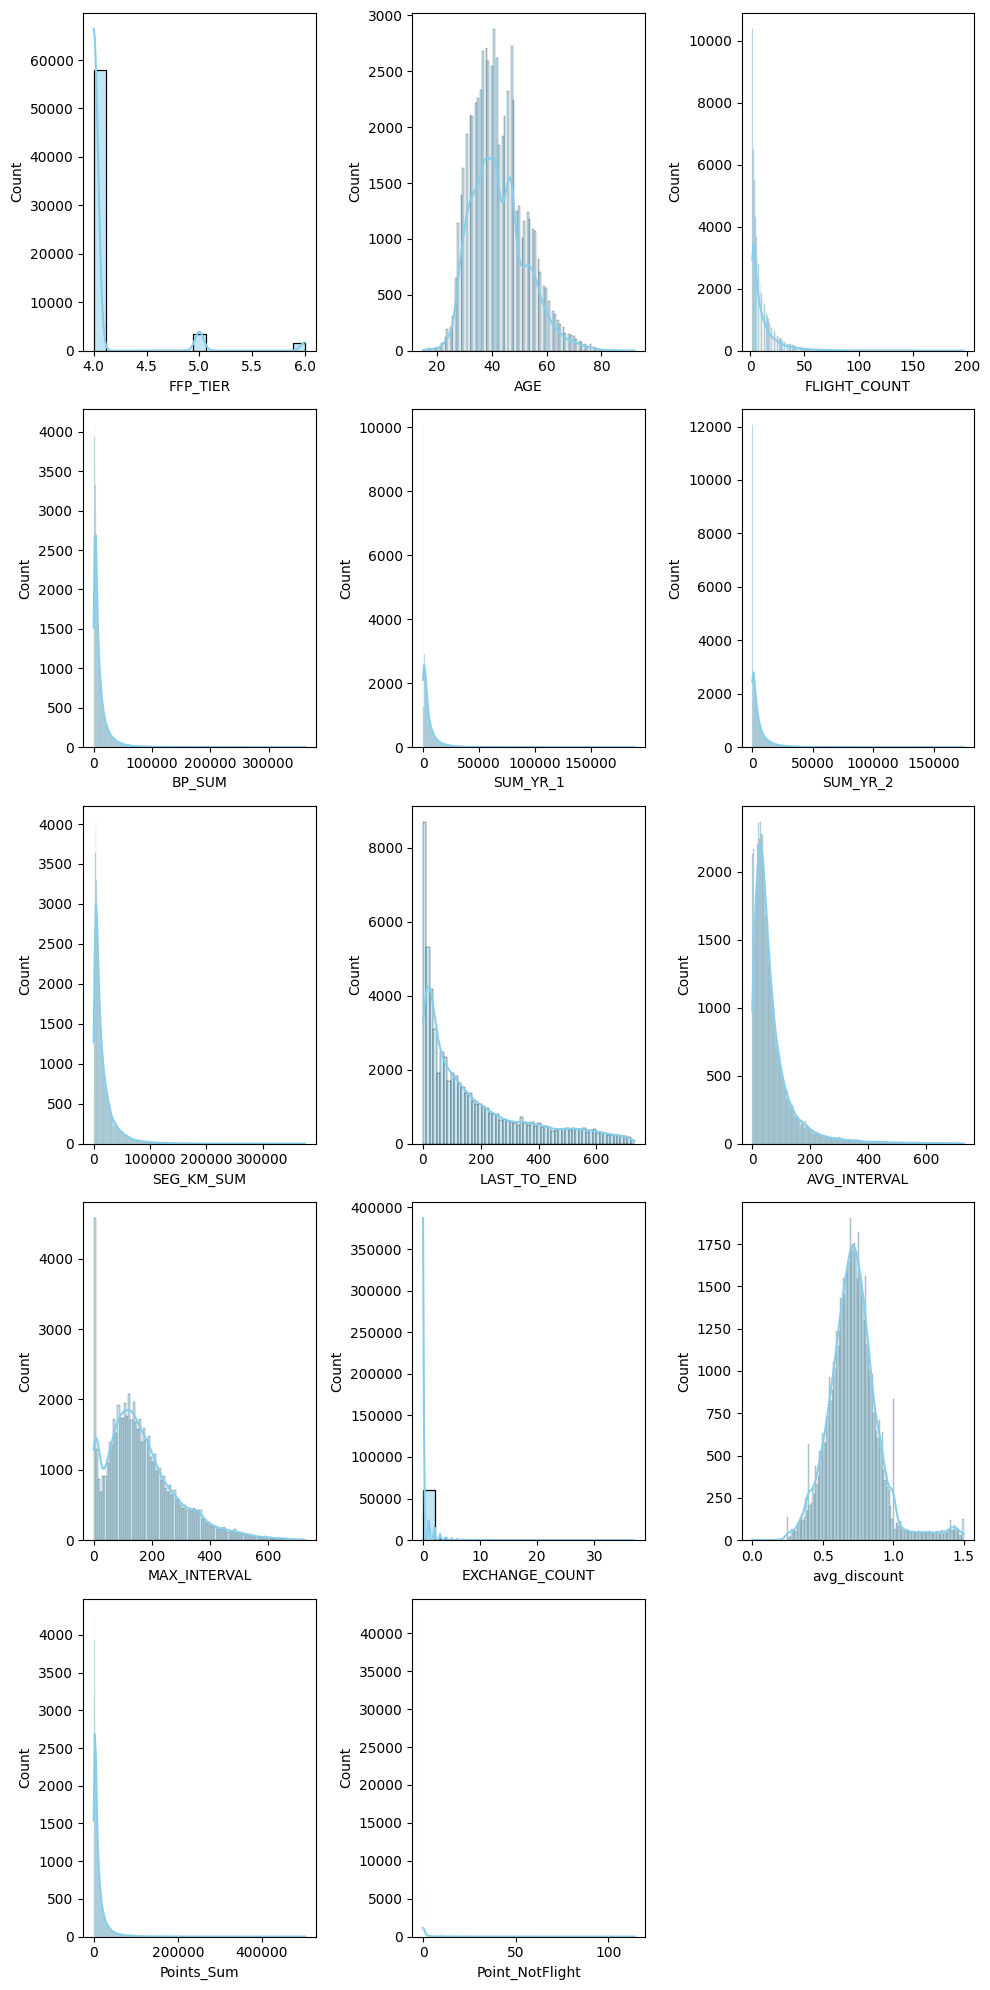

In [ ]:
plt.figure(figsize=(10,20))

features = numerical
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    # sns.kdeplot(x=data[features[i]], color='skyblue')
    sns.histplot(x=df[features[i]], color='skyblue', kde=True) # revised, histogram + kde
    plt.xlabel(features[i])
    plt.tight_layout()

### Observation

- The feature FFP_TIER is a categorical feature with only 3 values: 4, 5, or 6.
- The majority of numerical features showing positive skewness.

### Anomaly 1

In [ ]:
df[df['avg_discount'] >= 1].shape

(3699, 19)

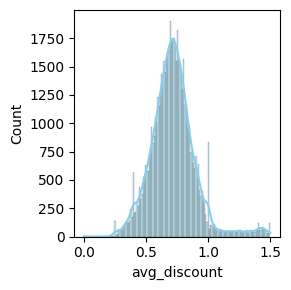

In [ ]:
plt.figure(figsize=(3,3))
plt.subplot(1, 1, 1)
sns.histplot(x=df['avg_discount'], color='skyblue', kde=True)
plt.xlabel('avg_discount')
plt.tight_layout()

The avg_discount represents the average discount obtained by customers. There are quite a few rows of data where avg_discount >= 1, whereas logically, discounts typically range between 0 and 1 (for example, a 10% discount would be represented as 0.1). If the average discount value exceeds 1, it may indicate an issue with data measurement or processing.

However, upon further examination, there are 3699 rows of data where avg_discount >= 1. This value exceeds 5% of the total dataset, suggesting that it is unlikely to be solely due to input or system errors, given the significant number of occurrences. Furthermore, based on visual analysis through a histplot of avg_discount, it appears that the most frequent discount value is around 0.7. Logically, airline discounts typically fall within the range of 10 - 50%. Therefore, the highest frequency at 0.7 or 70% is unusual. From this, we conclude that there may be different representations of discount values in the dataset, or other unknown factors related to avg_discount.

Therefore, we have decided to ignore these anomalies.

## Count Plot

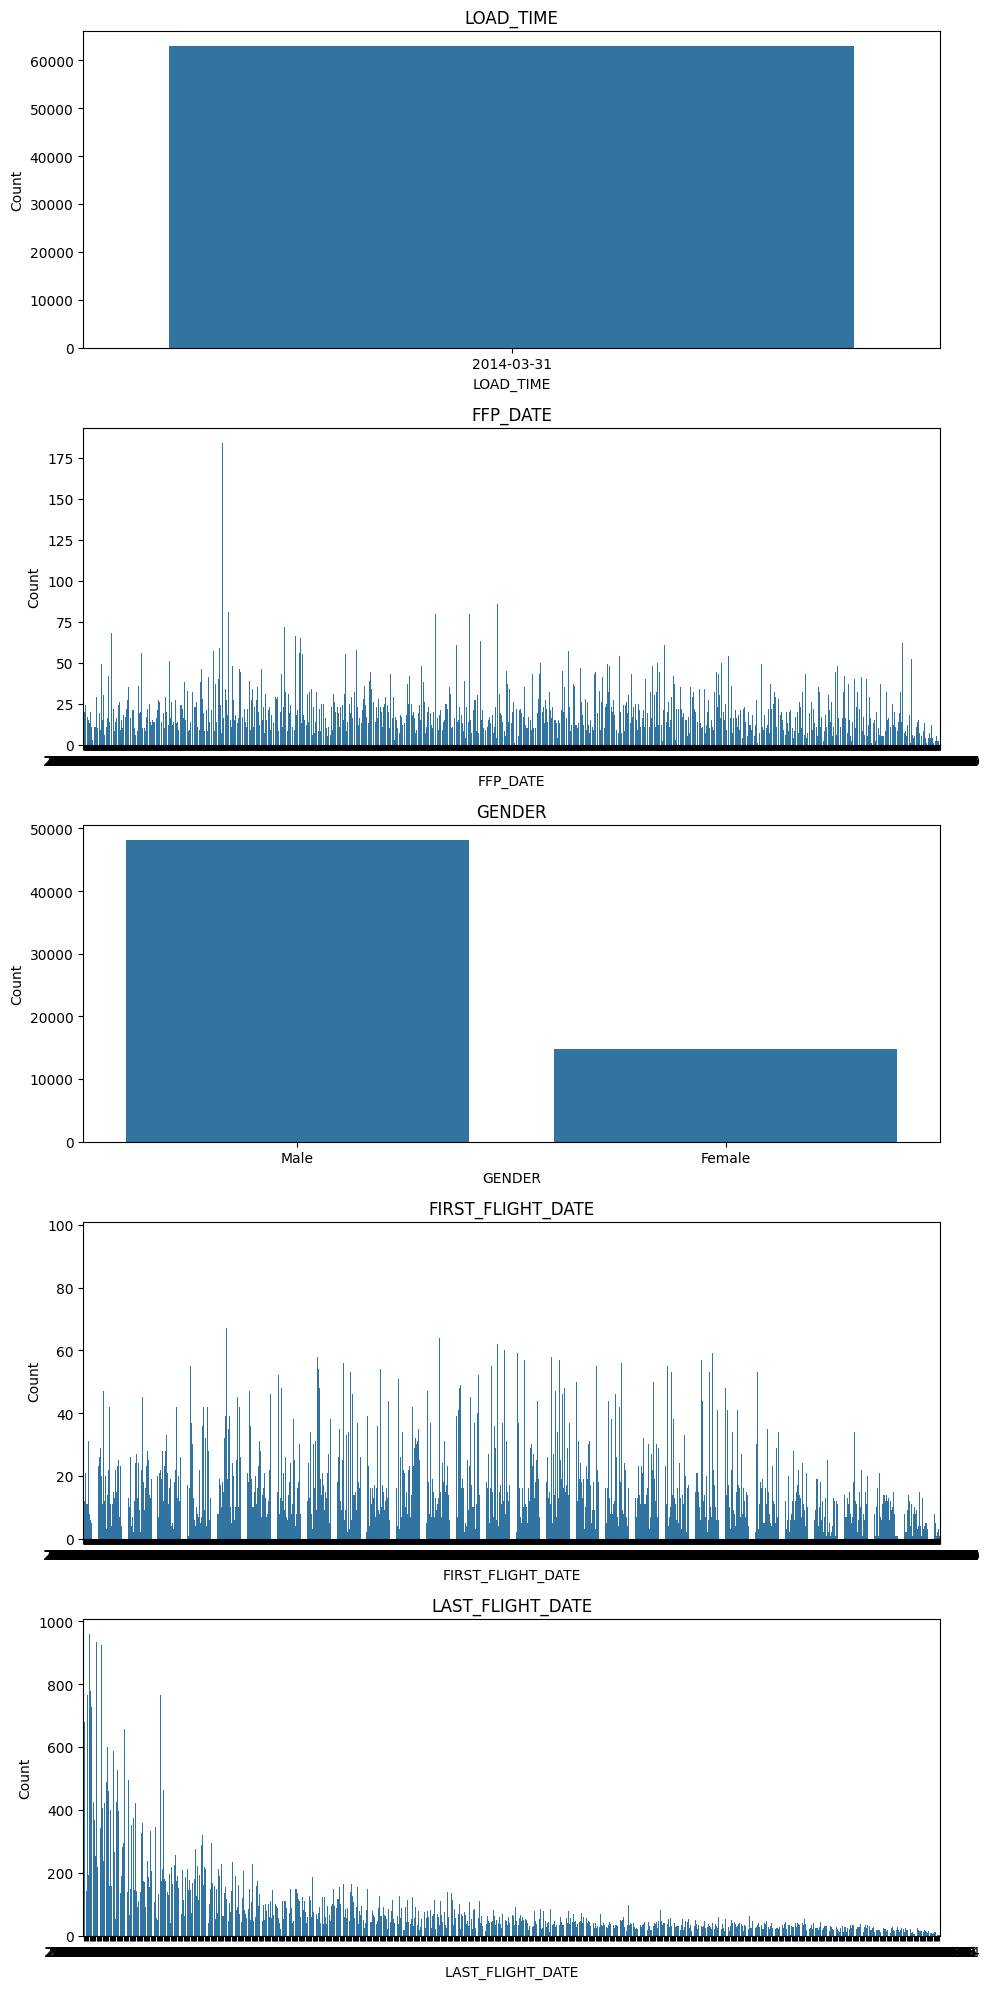

In [ ]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(categorical):
    plt.subplot(len(categorical), 1, i+1)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

### Observation

- The majority of airline users on this dataset are male.
- `LAST_FLIGHT_DATE` shows a declining trend over time. My insight: This decline could be due to an increase in the number of customers who no longer use this airline.
- `FIRST_FLIGHT_DATE` also shows a decline in recent times (declining trend). `FIRST_FLIGHT_DATE` is the date when a customer first flies with this airline. This decline could be happened because of a decrease in the number of new customers using this airline.
- `LOAD_TIME` is a column indicating the date when the data was extracted, and it only has one value, which is `2014-03-31`.

## Heatmap Correlation

<Axes: >

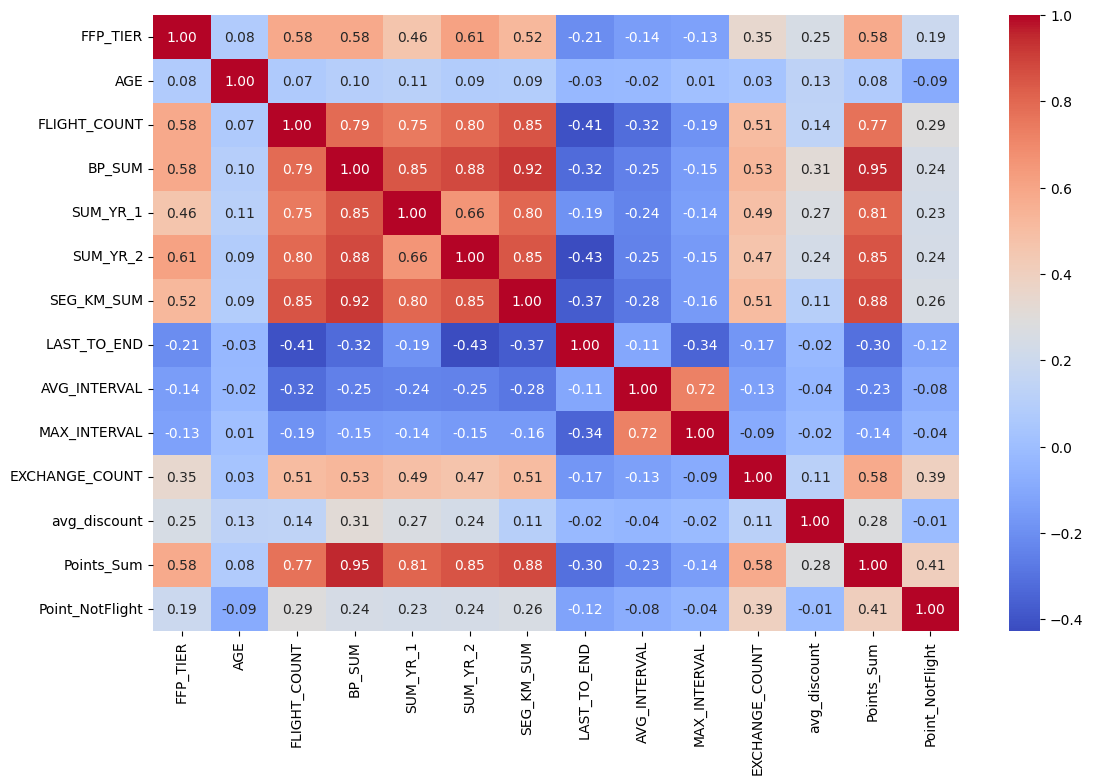

In [ ]:
plt.figure(figsize=(13,8))
correlation = df[numerical].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

### Observation

- `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, and `SEG_KM_SUM` are cyclic correlated with each other.
- `Points_Sum` are correlated with `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, and `SEG_KM_SUM`.
- `AVG_INTERVAL` is correlated with `MAX_INTERVAL`.

# Feature Selection

In customer analysis cases aiming to segment customers based on their purchasing behavior, RFM (Recency, Frequency, Monetary) analysis is commonly used. However, based on the reference paper we utilized (reference source), because of the research subject is airline customers, it is necessary to integrate well-established RFM theory with the realities of the airline industry. In this project, we will employ the LRFMC model, which incorporates the following indicators as indicators for airlines to identify customer value:

## LRFMC

### Definition

*   L (Length) = Interval of days between register date to observation time (current time). Larger number means they have been a member for longer time.
*   R (Recency) = The interval of days between the last consumption time to observation time (current time). Smaller number means they flew more recently.
*   F (Frequency) = Number of rides in the observation time window. Bigger number means they flew more frequently.
*   M (Monetary) = Number of miles flown within the observation time
window. Bigger number means that more flights occurred and/or that those flights covered longer distances
*   C (Customer Cost) = Average value of discount factor in the observation time window. Bigger number means they use more discounts.

### Implementation

Therefore, the features to be utilized in this analysis, according to the LRFMC theory, are as follows:

*   L = `FFP_DATE` - `LOAD_TIME`
*   R = `LAST_FLIGHT_DATE` - `LOAD_TIME`
*   F = `FLIGHT_COUNT`
*   M = `SEG_KM_SUM`
*   C = `avg_discount`

### Feature Engineering for "MEMBER_DURATION" & "LAST_FLIGHT_TO_OBS_DURATION"

Since the 'L' (Length) in LRFMC represents the interval of days between the registration date and the observation time, we need a column representing the difference between `FFP_DATE` and `LOAD_TIME`. Therefore, we will perform quick feature engineering to create a column named `MEMBER_DURATION`, which will contain the difference between `FFP_DATE` and `LOAD_TIME` in days. We represent it in days to align with the format of `LAST_TO_END`, which is also in days.

In [ ]:
df['MEMBER_DURATION'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days

In [ ]:
df['LAST_FLIGHT_TO_OBS_DURATION'] = (df['LOAD_TIME'] - df['LAST_FLIGHT_DATE']).dt.days

In [ ]:
df.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_DURATION,LAST_FLIGHT_TO_OBS_DURATION
1,2007-02-19,2007-08-03,Male,6,42,2014-03-31,140,362480,171483,167434,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33,2597,6
2,2007-02-01,2007-08-30,Male,6,40,2014-03-31,135,351159,163618,164982,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26,2615,10
3,2008-08-22,2008-08-23,Male,5,64,2014-03-31,23,337314,116350,125500,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12,2047,95


In [ ]:
df

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_DURATION,LAST_FLIGHT_TO_OBS_DURATION
1,2007-02-19,2007-08-03,Male,6,42,2014-03-31,140,362480,171483,167434,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33,2597,6
2,2007-02-01,2007-08-30,Male,6,40,2014-03-31,135,351159,163618,164982,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26,2615,10
3,2008-08-22,2008-08-23,Male,5,64,2014-03-31,23,337314,116350,125500,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12,2047,95
4,2009-04-10,2009-04-15,Male,6,48,2014-03-31,152,273844,124560,130702,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39,1816,4
5,2008-02-10,2009-09-29,Male,6,64,2014-03-31,92,313338,112364,76946,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15,2241,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,2011-05-20,2013-06-05,Female,4,25,2014-03-31,2,0,0,0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22,1046,295
62984,2010-03-08,2013-09-14,Male,4,38,2014-03-31,4,0,0,0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43,1484,87
62985,2006-03-30,2006-12-02,Female,4,43,2014-03-31,2,0,0,0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0,2923,28
62986,2013-02-06,2013-02-14,Female,4,36,2014-03-31,2,0,0,0,3934,2013-02-26,400,12.000000,12,0,0.000000,0,0,418,398


In [ ]:
df_lrfmc = df.copy()

In [ ]:
df_lrfmc = df_lrfmc[['MEMBER_DURATION', 'LAST_FLIGHT_TO_OBS_DURATION',
                     'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]

In [ ]:
df_lrfmc.head(3)

,MEMBER_DURATION,LAST_FLIGHT_TO_OBS_DURATION,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
1,2597,6,140,293678,1.252314
2,2615,10,135,283712,1.254676
3,2047,95,23,281336,1.090870


## Feature Transformation

In [ ]:
df_lrfmc.columns = ['L', 'R', 'F', 'M', 'C']

In [ ]:
df_lrfmc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62959 entries, 1 to 62987
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       62959 non-null  int64  
 1   R       62959 non-null  int64  
 2   F       62959 non-null  int64  
 3   M       62959 non-null  int64  
 4   C       62959 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.9 MB


In [ ]:
df_lrfmc.head(3)

,L,R,F,M,C
1,2597,6,140,293678,1.252314
2,2615,10,135,283712,1.254676
3,2047,95,23,281336,1.090870


# Data Standardization

In clustering algorithms sensitive to data scale, such as K-Means, standardization of the features used is required. This is done to avoid bias towards the scale. Clustering algorithms like K-Means utilize the distance between data points as a metric for grouping data. If variables have different scales, variables with larger values will dominate in distance calculations. This can lead to biased clustering results. So here we will do data standardization towards our LRFMC features.

In [ ]:
lrfmc_std = StandardScaler().fit_transform(df_lrfmc.astype(float))

In [ ]:
lrfmc_std

array([[ 1.3128329 , -0.91729929,  9.15330129, 13.28894168,  2.86306399],
       [ 1.33408098, -0.8955109 ,  8.79622081, 12.81008827,  2.87580028],
       [ 0.66358599, -0.43250753,  0.79761795, 12.69592454,  1.99218641],
       ...,
       [ 1.69765925, -0.79746313, -0.70212009, -0.69726798, -3.8922608 ],
       [-1.25936531,  1.21796331, -0.70212009, -0.63288271, -3.8922608 ],
       [-1.27235025,  1.23430461, -0.70212009, -0.61904468, -3.8922608 ]])

In [ ]:
df_lrfmc = pd.DataFrame(data=lrfmc_std, columns=['L', 'R', 'F', 'M', 'C'])

In [ ]:
df_lrfmc

,L,R,F,M,C
0,1.312833,-0.917299,9.153301,13.288942,2.863064
1,1.334081,-0.895511,8.796221,12.810088,2.875800
2,0.663586,-0.432508,0.797618,12.695925,1.992186
3,0.390902,-0.928193,10.010294,14.069733,1.343732
4,0.892593,-0.530555,5.725329,13.332522,1.327736
...,...,...,...,...,...
62954,-0.518043,0.656912,-0.702120,-0.767419,-3.892261
62955,-0.001007,-0.476084,-0.559288,-0.436748,-3.892261
62956,1.697659,-0.797463,-0.702120,-0.697268,-3.892261
62957,-1.259365,1.217963,-0.702120,-0.632883,-3.892261


# K-Means Clustering

## Best K

To determine the optimal number of clusters (K), we will use the elbow method to identify the number of clusters where adding one more cluster does not significantly decrease the variation in the data.

<Axes: >

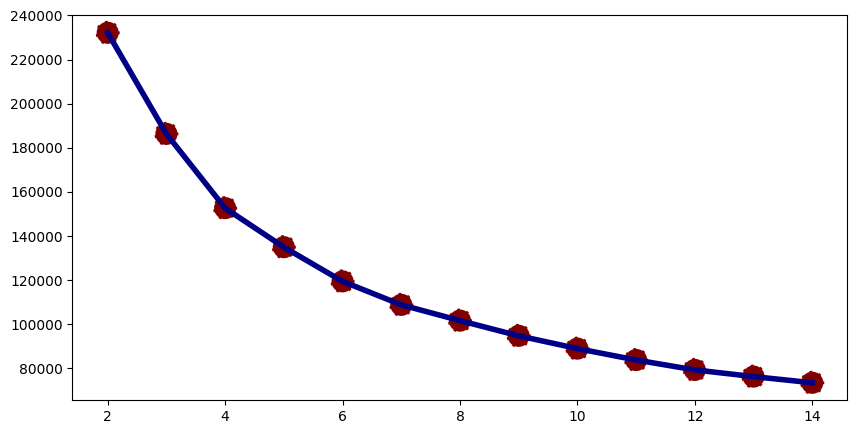

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(lrfmc_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

sns.lineplot(x=range(2, 15), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='#800000',  linestyle='--')


Based on the elbow method results, clusters ranging from 4 to 6 are potential candidates for the most optimal number of clusters. To confirm this, we will also check using the silhouette method.

In [ ]:
from sklearn.metrics import silhouette_score

arr_silhouette_score_euclidean = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i).fit(df_lrfmc)
    preds = kmeans.predict(df_lrfmc)

    score_euclidean = silhouette_score(df_lrfmc, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

<Axes: >

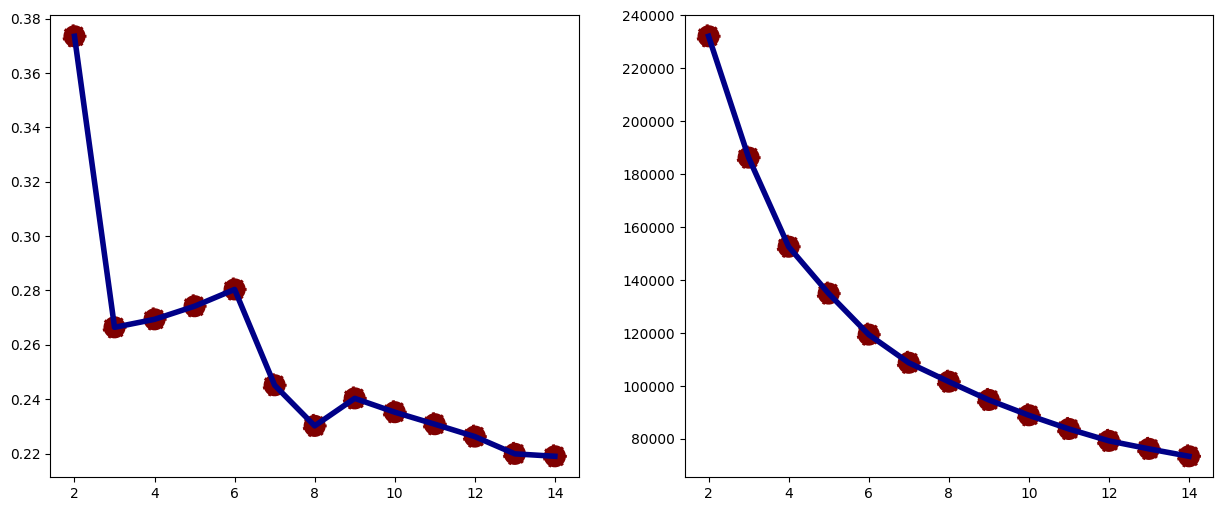

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))
sns.lineplot(x=range(2,15), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4, ax=ax[0])
sns.scatterplot(x=range(2,15), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--',ax=ax[0])

sns.lineplot(x=range(2, 15), y=inertia, color='#000087', linewidth = 4,ax=ax[1])
sns.scatterplot(x=range(2, 15), y=inertia, s=300, color='#800000',  linestyle='--', ax=ax[1])

**Observations:**

- It turns out that the highest silhouette score is achieved with 2 clusters. However, having only 2 clusters may not be very useful for segmenting customers in this case and may not significantly impact business value.

- Other candidates with high silhouette scores and considering the significant drop in inertia from the elbow method are clusters in the following order: 6 -> 5 -> 4. Therefore, we will examine clusters with K = 6, K = 5, and K = 4.

## 6 Clusters

### Clustering

In [ ]:
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(lrfmc_std)

KMeans(n_clusters=6, random_state=0)

In [ ]:
df_cluster_6 = df_lrfmc.copy()

df_cluster_6['clusters'] = kmeans_6.labels_
df_cluster_6.head()

,L,R,F,M,C,clusters
0,1.312833,-0.917299,9.153301,13.288942,2.863064,3
1,1.334081,-0.895511,8.796221,12.810088,2.875800,3
2,0.663586,-0.432508,0.797618,12.695925,1.992186,3
3,0.390902,-0.928193,10.010294,14.069733,1.343732,3
4,0.892593,-0.530555,5.725329,13.332522,1.327736,3


In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
df_cluster_6.describe(percentiles=perc)

,L,R,F,M,C,clusters
count,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,62959.000000
mean,1.155666e-16,5.778330e-17,-2.889165e-17,3.611456e-17,1.516812e-16,1.561222
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.688060
min,-1.321929e+00,-9.499819e-01,-7.021201e-01,-8.042244e-01,-3.892261e+00,0.000000
10%,-1.148403e+00,-9.064051e-01,-7.021201e-01,-6.908775e-01,-1.146326e+00,0.000000
20%,-9.784185e-01,-8.410399e-01,-6.307040e-01,-6.270208e-01,-7.366116e-01,0.000000
30%,-7.730204e-01,-7.484392e-01,-5.592879e-01,-5.561970e-01,-4.660281e-01,0.000000
40%,-5.345697e-01,-5.795792e-01,-4.878718e-01,-4.619254e-01,-2.462580e-01,1.000000
50%,-2.536228e-01,-3.725894e-01,-3.450396e-01,-3.417556e-01,-5.231235e-02,1.000000
60%,1.288426e-01,-1.165758e-01,-2.022074e-01,-1.795912e-01,1.457209e-01,2.000000


In [ ]:
df_cluster_6_agg = df_cluster_6.groupby('clusters').agg('median').reset_index()

In [ ]:
df_cluster_6_agg

,clusters,L,R,F,M,C
0,0,-0.786005,-0.470637,-0.345040,-0.368879,-0.187069
1,1,-0.578246,1.670072,-0.630704,-0.619045,-0.053225
2,2,1.125142,-0.437955,-0.345040,-0.333059,-0.116270
3,3,0.812323,-0.906405,3.654262,3.398644,0.250382
4,4,0.095200,-0.367142,-0.345040,-0.317251,2.758236
5,5,0.141828,-0.841040,1.154698,1.102613,0.042481


### Visualization

In [ ]:
from sklearn.decomposition import PCA

pca_6 = PCA(n_components=2)

pca_6.fit(df_cluster_6)
pcs_6 = pca_6.transform(df_cluster_6)

df_pca_6 = pd.DataFrame(data = pcs_6, columns = ['PC 1', 'PC 2'])
df_pca_6['clusters'] = df_cluster_6['clusters']
df_pca_6.head()

,PC 1,PC 2,clusters
0,10.344169,8.507694,3
1,10.038388,8.117812,3
2,6.611018,4.814867,3
3,10.493514,9.987266,3
4,8.658562,7.438186,3


<Axes: xlabel='PC 1', ylabel='PC 2'>

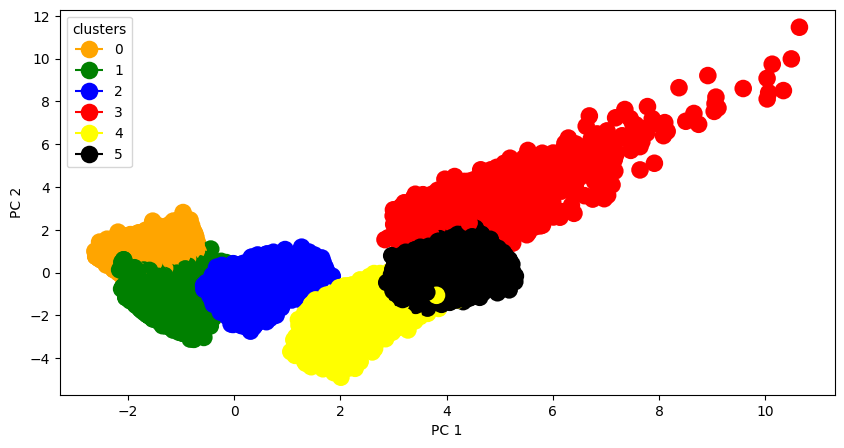

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='none',
    linestyle='--',
    palette= ['orange', 'green', 'blue', 'red', 'yellow', 'black'],
    data=df_pca_6,
    s=160,
    ax=ax
)

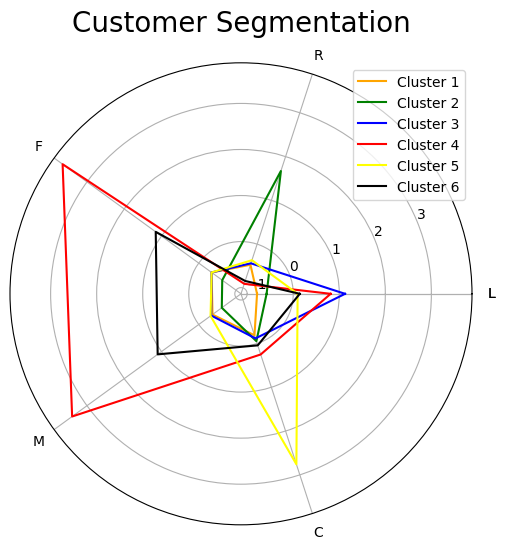

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['orange', 'green', 'blue', 'red', 'yellow', 'black']
clusters = []

for i in range(0,6):
    num = []
    for cat in category:
        num.append(df_cluster_6_agg[cat][i])
    num.append(df_cluster_6_agg['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,6):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

### Observation

- Cluster with K = 6 has provided a satisfactory segmentation, where each dimension (L, R, F, M, C) has a cluster with high values.

- However, clusters 6 and 4 overlap, where customers in cluster 6 actually exhibit the same characteristics as cluster 4, but are only differentiated by their ranges. Cluster 6 has lower LRFMC values compared to cluster 4. However, in terms of characteristics, they are the same. Therefore, we will not use cluster K = 6.

## 5 Cluster

### Clustering

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(lrfmc_std)

KMeans(n_clusters=5, random_state=0)

In [ ]:
df_cluster_5 = df_lrfmc.copy()

df_cluster_5['clusters'] = kmeans_5.labels_
df_cluster_5.head()

,L,R,F,M,C,clusters
0,1.312833,-0.917299,9.153301,13.288942,2.863064,1
1,1.334081,-0.895511,8.796221,12.810088,2.875800,1
2,0.663586,-0.432508,0.797618,12.695925,1.992186,1
3,0.390902,-0.928193,10.010294,14.069733,1.343732,1
4,0.892593,-0.530555,5.725329,13.332522,1.327736,1


In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
df_cluster_5.describe(percentiles=perc)

,L,R,F,M,C,clusters
count,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,62959.000000
mean,1.155666e-16,5.778330e-17,-2.889165e-17,3.611456e-17,1.516812e-16,1.836719
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.673211
min,-1.321929e+00,-9.499819e-01,-7.021201e-01,-8.042244e-01,-3.892261e+00,0.000000
10%,-1.148403e+00,-9.064051e-01,-7.021201e-01,-6.908775e-01,-1.146326e+00,0.000000
20%,-9.784185e-01,-8.410399e-01,-6.307040e-01,-6.270208e-01,-7.366116e-01,0.000000
30%,-7.730204e-01,-7.484392e-01,-5.592879e-01,-5.561970e-01,-4.660281e-01,0.000000
40%,-5.345697e-01,-5.795792e-01,-4.878718e-01,-4.619254e-01,-2.462580e-01,1.000000
50%,-2.536228e-01,-3.725894e-01,-3.450396e-01,-3.417556e-01,-5.231235e-02,2.000000
60%,1.288426e-01,-1.165758e-01,-2.022074e-01,-1.795912e-01,1.457209e-01,3.000000


In [ ]:
df_cluster_5_agg = df_cluster_5.groupby('clusters').agg('median').reset_index()

In [ ]:
df_cluster_5_agg

,clusters,L,R,F,M,C
0,0,-0.762396,-0.546897,-0.273624,-0.295917,-0.210740
1,1,0.482977,-0.884617,2.154524,2.013976,0.152196
2,2,-0.182796,-0.116576,-0.487872,-0.478935,1.502011
3,3,-0.568803,1.653731,-0.630704,-0.616834,-0.116270
4,4,1.131044,-0.541449,-0.202207,-0.224469,-0.115448


### Visualization

In [ ]:
from sklearn.decomposition import PCA

pca_5 = PCA(n_components=2)

pca_5.fit(df_cluster_5)
pcs_5 = pca_5.transform(df_cluster_5)

df_pca_5 = pd.DataFrame(data = pcs_5, columns = ['PC 1', 'PC 2'])
df_pca_5['clusters'] = df_cluster_5['clusters']
df_pca_5.head()

,PC 1,PC 2,clusters
0,3.914882,14.287572,1
1,3.773262,13.800035,1
2,2.648162,8.443084,1
3,4.514014,14.666563,1
4,3.471773,11.739313,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

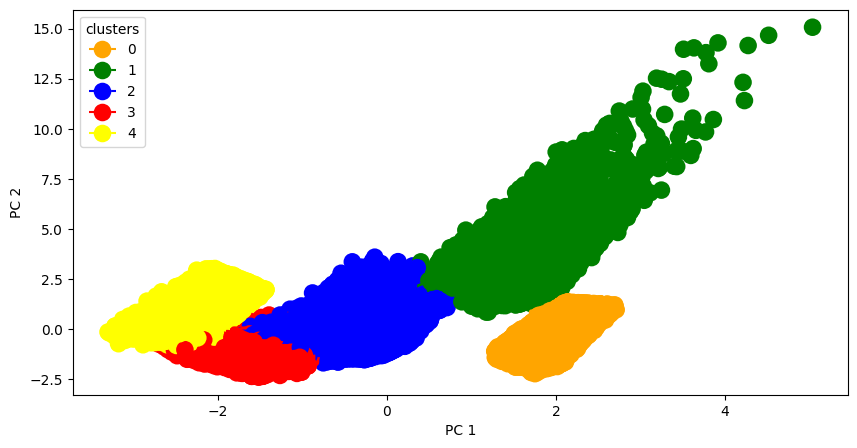

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='none',
    linestyle='--',
    palette= ['orange', 'green', 'blue', 'red', 'yellow'],
    data=df_pca_5,
    s=160,
    ax=ax
)

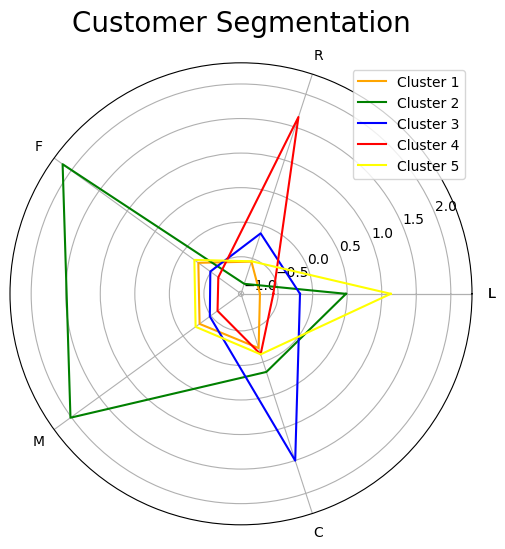

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['orange', 'green', 'blue', 'red', 'yellow']
clusters = []

for i in range(0,5):
    num = []
    for cat in category:
        num.append(df_cluster_5_agg[cat][i])
    num.append(df_cluster_5_agg['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,5):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

### Observation

- Cluster with K = 5 has provided a satisfactory segmentation, where each dimension (L, R, F, M, C) has a cluster with high values.

- All clusters also have unique characteristics in customer segmentation, and there is no overlap in characteristics like cluster K = 6. The number of clusters K = 5 is the best candidate for the clustering to be performed in this project.

Next, we will still check the cluster with K = 4 because based on the results of the previous elbow method and silhouette method, the optimal number of clusters falls within the range of K = 4 to K = 6.

## 4 Cluster

### Clustering

In [ ]:
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(lrfmc_std)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df_cluster_4 = df_lrfmc.copy()

df_cluster_4['clusters'] = kmeans_4.labels_
df_cluster_4.head()

,L,R,F,M,C,clusters
0,1.312833,-0.917299,9.153301,13.288942,2.863064,0
1,1.334081,-0.895511,8.796221,12.810088,2.875800,0
2,0.663586,-0.432508,0.797618,12.695925,1.992186,0
3,0.390902,-0.928193,10.010294,14.069733,1.343732,0
4,0.892593,-0.530555,5.725329,13.332522,1.327736,0


In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
df_cluster_4.describe(percentiles=perc)

,L,R,F,M,C,clusters
count,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,62959.000000
mean,1.155666e-16,5.778330e-17,-2.889165e-17,3.611456e-17,1.516812e-16,1.755269
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.888733
min,-1.321929e+00,-9.499819e-01,-7.021201e-01,-8.042244e-01,-3.892261e+00,0.000000
10%,-1.148403e+00,-9.064051e-01,-7.021201e-01,-6.908775e-01,-1.146326e+00,1.000000
20%,-9.784185e-01,-8.410399e-01,-6.307040e-01,-6.270208e-01,-7.366116e-01,1.000000
30%,-7.730204e-01,-7.484392e-01,-5.592879e-01,-5.561970e-01,-4.660281e-01,1.000000
40%,-5.345697e-01,-5.795792e-01,-4.878718e-01,-4.619254e-01,-2.462580e-01,2.000000
50%,-2.536228e-01,-3.725894e-01,-3.450396e-01,-3.417556e-01,-5.231235e-02,2.000000
60%,1.288426e-01,-1.165758e-01,-2.022074e-01,-1.795912e-01,1.457209e-01,2.000000


In [ ]:
df_cluster_4_agg = df_cluster_4.groupby('clusters').agg('median').reset_index()

In [ ]:
df_cluster_4_agg

,clusters,L,R,F,M,C
0,0,0.478256,-0.884617,2.083108,1.953123,0.157723
1,1,1.096811,-0.525108,-0.273624,-0.244265,-0.006166
2,2,-0.757675,-0.530555,-0.345040,-0.312638,-0.147779
3,3,-0.556998,1.599260,-0.630704,-0.617219,-0.026366


### Visualization

In [ ]:
from sklearn.decomposition import PCA

pca_4 = PCA(n_components=2)

pca_4.fit(df_cluster_4)
pcs_4 = pca_4.transform(df_cluster_4)

df_pca_4 = pd.DataFrame(data = pcs_4, columns = ['PC 1', 'PC 2'])
df_pca_4['clusters'] = df_cluster_4['clusters']
df_pca_4.head()

,PC 1,PC 2,clusters
0,13.424894,1.495186,0
1,12.992775,1.309487,0
2,8.294039,0.830000,0
3,13.852946,3.439722,0
4,11.211853,2.168663,0


<Axes: xlabel='PC 1', ylabel='PC 2'>

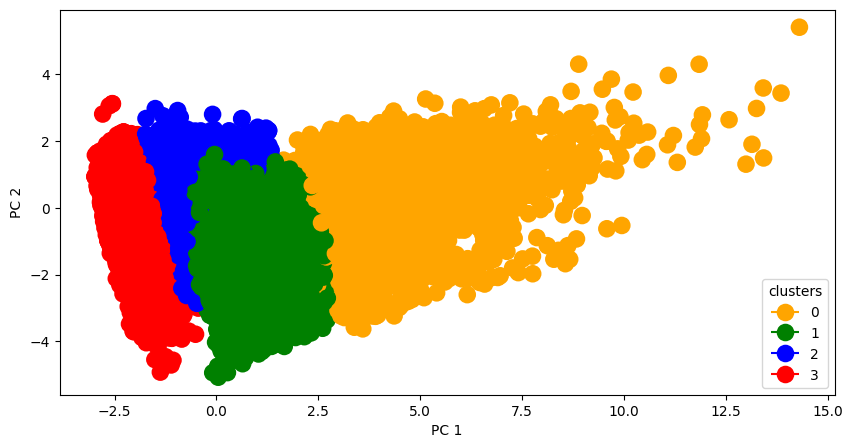

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='none',
    linestyle='--',
    palette= ['orange', 'green', 'blue', 'red'],
    data=df_pca_4,
    s=160,
    ax=ax
)

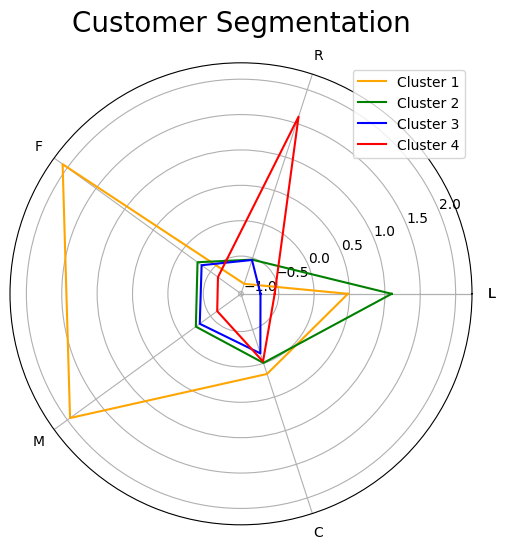

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['orange', 'green', 'blue', 'red']
clusters = []

for i in range(0,4):
    num = []
    for cat in category:
        num.append(df_cluster_4_agg[cat][i])
    num.append(df_cluster_4_agg['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,4):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

### Observation

- Cluster with K = 4 does not provide good segmentation results. While L (Length), R (Recency), F (Frequency), and M (Monetary) have clusters with high values, C (Customer Cost) does not have clusters with high values. Therefore, the cluster with K = 4 does not provide good segmentation results and will not be used.

# Best Cluster Modeling (K = 5)

Based on the previous observation results, it was found that K = 5 is the most optimal number of clusters. Therefore, modeling will be conducted using a total of 5 clusters.

## Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(lrfmc_std)

KMeans(n_clusters=5, random_state=0)

In [ ]:
df_cluster = df_lrfmc.copy()

df_cluster['clusters'] = kmeans.labels_
df_cluster.head()

,L,R,F,M,C,clusters
0,1.312833,-0.917299,9.153301,13.288942,2.863064,1
1,1.334081,-0.895511,8.796221,12.810088,2.875800,1
2,0.663586,-0.432508,0.797618,12.695925,1.992186,1
3,0.390902,-0.928193,10.010294,14.069733,1.343732,1
4,0.892593,-0.530555,5.725329,13.332522,1.327736,1


In [ ]:
perc = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
df_cluster.describe(percentiles=perc)

,L,R,F,M,C,clusters
count,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,6.295900e+04,62959.000000
mean,1.155666e-16,5.778330e-17,-2.889165e-17,3.611456e-17,1.516812e-16,1.836719
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.673211
min,-1.321929e+00,-9.499819e-01,-7.021201e-01,-8.042244e-01,-3.892261e+00,0.000000
10%,-1.148403e+00,-9.064051e-01,-7.021201e-01,-6.908775e-01,-1.146326e+00,0.000000
20%,-9.784185e-01,-8.410399e-01,-6.307040e-01,-6.270208e-01,-7.366116e-01,0.000000
30%,-7.730204e-01,-7.484392e-01,-5.592879e-01,-5.561970e-01,-4.660281e-01,0.000000
40%,-5.345697e-01,-5.795792e-01,-4.878718e-01,-4.619254e-01,-2.462580e-01,1.000000
50%,-2.536228e-01,-3.725894e-01,-3.450396e-01,-3.417556e-01,-5.231235e-02,2.000000
60%,1.288426e-01,-1.165758e-01,-2.022074e-01,-1.795912e-01,1.457209e-01,3.000000


In [ ]:
df_cluster_agg = df_cluster.groupby('clusters').agg('median').reset_index()

In [ ]:
df_cluster_agg

,clusters,L,R,F,M,C
0,0,-0.762396,-0.546897,-0.273624,-0.295917,-0.210740
1,1,0.482977,-0.884617,2.154524,2.013976,0.152196
2,2,-0.182796,-0.116576,-0.487872,-0.478935,1.502011
3,3,-0.568803,1.653731,-0.630704,-0.616834,-0.116270
4,4,1.131044,-0.541449,-0.202207,-0.224469,-0.115448


## Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(df_cluster)
pcs = pca.transform(df_cluster)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.head()

,PC 1,PC 2,clusters
0,3.914882,14.287572,1
1,3.773262,13.800035,1
2,2.648162,8.443084,1
3,4.514014,14.666563,1
4,3.471773,11.739313,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

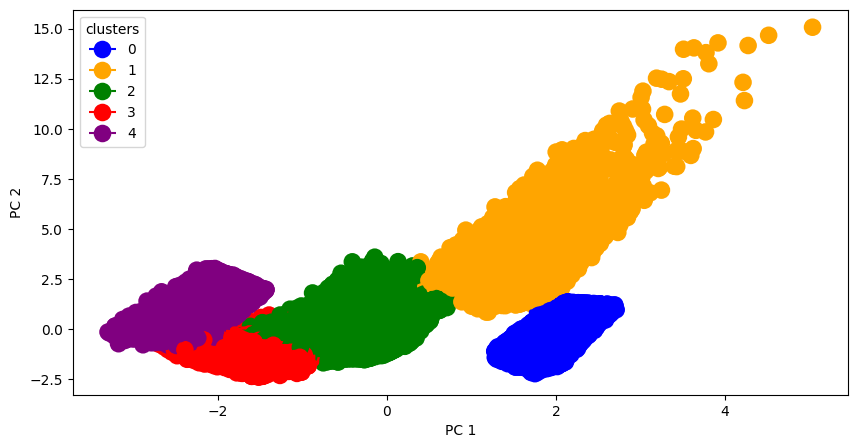

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='none',
    linestyle='--',
    palette= ['blue', 'orange', 'green', 'red', 'purple'],
    data=df_pca,
    s=160,
    ax=ax
)

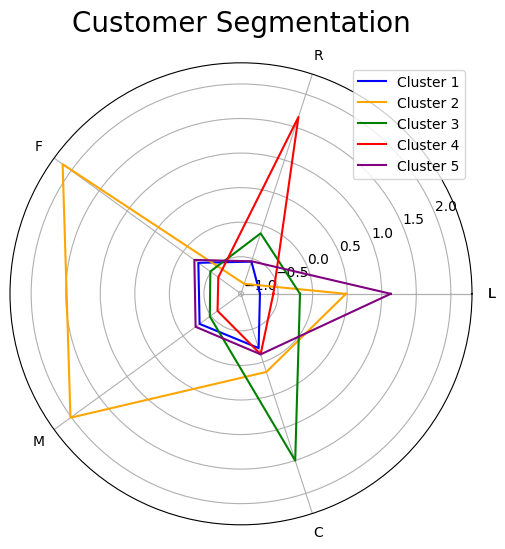

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
# Six dimensions are created to ensure that the polygon shape is fully closed.
#The sequence starts from L -> R -> F -> M -> C -> L (the starting point).
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

for i in range(0,5):
    num = []
    for cat in category:
        num.append(df_cluster_agg[cat][i])
    num.append(df_cluster_agg['L'][i])
    clusters.append(num)
    # Save LRFMC data for each clusters

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))
# determine the positions of the angles along the circular plot
# to evenly place category labels around the radar plot.

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for i in range(0,5):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')
    # Plot data from each clusters

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

### Cluster 1

In [ ]:
df_cluster_agg[df_cluster_agg['clusters'] == 0]

,clusters,L,R,F,M,C
0,0,-0.762396,-0.546897,-0.273624,-0.295917,-0.21074


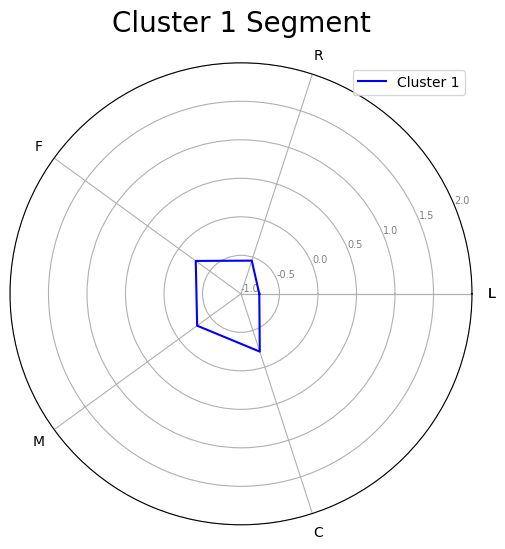

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
# Six dimensions are created to ensure that the polygon shape is fully closed.
#The sequence starts from L -> R -> F -> M -> C -> L (the starting point).
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

num = []
for cat in category:
    num.append(df_cluster_agg[cat][0])
num.append(df_cluster_agg['L'][0])
#clusters.append(num)
# Save LRFMC data for each clusters

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(num))
# determine the positions of the angles along the circular plot
# to evenly place category labels around the radar plot.

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

plt.plot(label_loc, num, color=color[0], label=f'Cluster 1')
# Plot data from each clusters

plt.title('Cluster 1 Segment', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1.0,-0.5,0.0,0.5,1.0,1.5,2.0], ["-1.0","-0.5","0.0","0.5","1.0","1.5","2.0"], color="grey", size=7)
plt.legend()
plt.show()

**Observations:**

- Cluster 1 has the smallest values of LRFMC compared to other clusters. This cluster can be interpreted as a group of customers who have recently joined the airline. This is evidenced by their smallest Length (member duration) value among the clusters.

- The Customer Cost (C) in this cluster is the lowest because they have not yet used the services as much as other clusters. However, it is still considered normal as it is not significantly lower than other clusters and is even competitive. The company is quite generous in providing discounts to new customers.

- The Frequency (F) and Monetary (M) values in this cluster rank third and are almost equivalent to the second-ranked cluster (cluster 5). This indicates that these new users are quite frequent flyers and have a high number of miles (which correlates with high transaction values for the business), making their contribution quite significant to the business revenue

**Cluster 1 can be characterized as "Prospective New Customers".**

### Cluster 2

In [ ]:
df_cluster_agg[df_cluster_agg['clusters'] == 1]

,clusters,L,R,F,M,C
1,1,0.482977,-0.884617,2.154524,2.013976,0.152196


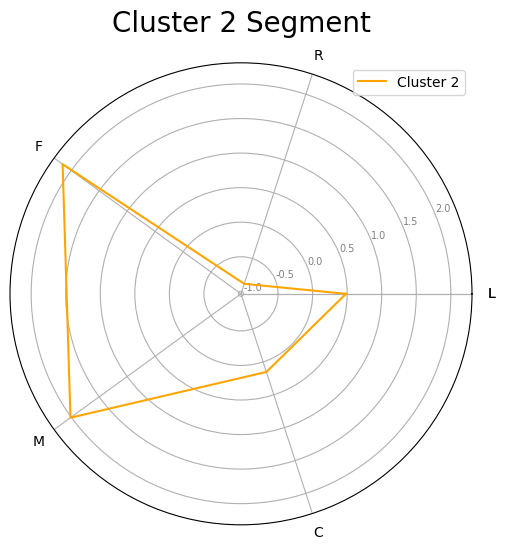

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

num = []
for cat in category:
    num.append(df_cluster_agg[cat][1])
num.append(df_cluster_agg['L'][1])

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(num))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

plt.plot(label_loc, num, color=color[1], label=f'Cluster 2')

plt.title('Cluster 2 Segment', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1.0,-0.5,0.0,0.5,1.0,1.5,2.0], ["-1.0","-0.5","0.0","0.5","1.0","1.5","2.0"], color="grey", size=7)
plt.legend()
plt.show()

**Observations:**

- Cluster 2 has the second highest value of L (Length), with F (Frequency) and M (Monetary) values significantly higher than other clusters. Customers in this cluster have been using the airline's services for a long time and are very active, with a high number of miles. The contribution of customers in cluster 2 to this business is very significant and important.

- The R (Recency) value of this cluster is the smallest, indicating that customers in this cluster recently used the services (more smaller the recency, more recent they used the services).

**Cluster 2 can be characterized as "Loyal Customers".**

### Cluster 3

In [ ]:
df_cluster_agg[df_cluster_agg['clusters'] == 2]

,clusters,L,R,F,M,C
2,2,-0.182796,-0.116576,-0.487872,-0.478935,1.502011


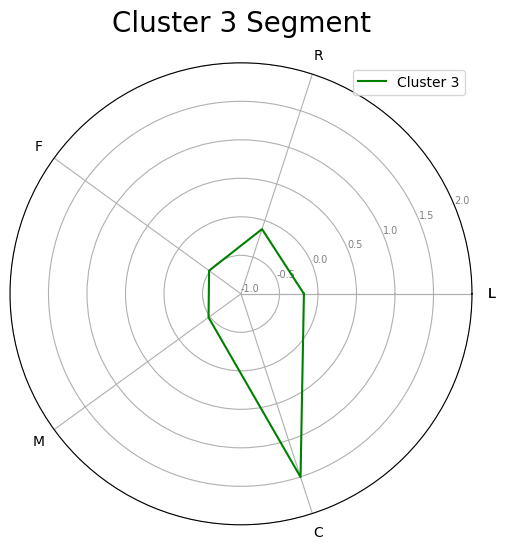

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

num = []
for cat in category:
    num.append(df_cluster_agg[cat][2])
num.append(df_cluster_agg['L'][2])

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(num))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

plt.plot(label_loc, num, color=color[2], label=f'Cluster 3')

plt.title('Cluster 3 Segment', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1.0,-0.5,0.0,0.5,1.0,1.5,2.0], ["-1.0","-0.5","0.0","0.5","1.0","1.5","2.0"], color="grey", size=7)
plt.legend()
plt.show()

**Observations:**

- Cluster 3 has a high value of C (Customer Cost). This indicates that cluster 3 is a segment of customers who frequently use discounts.

- The values of F (Frequency) and M (Monetary) for customers in cluster 3 are very low. This indicates that customers in cluster 3 always take advantage of discounts. It can be said that cluster 3 has a very small contribution to the company.

**Cluster 3 can be characterized as "Discount Seekers".**

### Cluster 4

In [ ]:
df_cluster_agg[df_cluster_agg['clusters'] == 3]

,clusters,L,R,F,M,C
3,3,-0.568803,1.653731,-0.630704,-0.616834,-0.11627


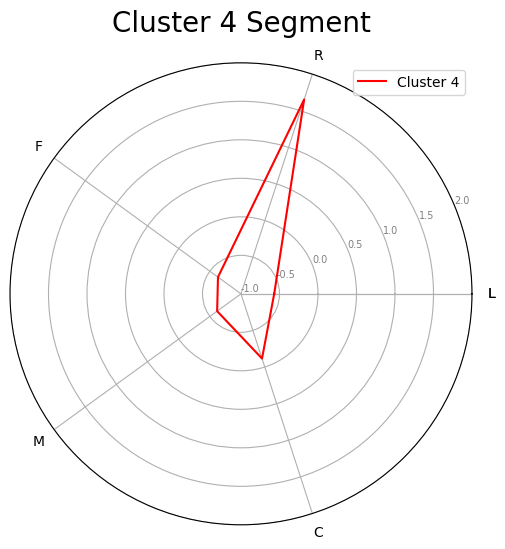

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

num = []
for cat in category:
    num.append(df_cluster_agg[cat][3])
num.append(df_cluster_agg['L'][3])

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(num))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

plt.plot(label_loc, num, color=color[3], label=f'Cluster 4')

plt.title('Cluster 4 Segment', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1.0,-0.5,0.0,0.5,1.0,1.5,2.0], ["-1.0","-0.5","0.0","0.5","1.0","1.5","2.0"], color="grey", size=7)
plt.legend()
plt.show()

**Observations:**

- Cluster 4 ranks fourth out of 5 clusters in terms of L (Length), indicating that customers in cluster 4 are relatively new members.

- One important observation is the Recency (R) value of cluster 4, which ranks first and is relatively high. This suggests that customers in cluster 4 have not used the airline's services for quite some time compared to other clusters.

- The values of F (Frequency) and M (Monetary) for cluster 4 are the lowest (ranked 5 out of 5 clusters). Customers in cluster 4 have minimally used the airline's services since joining the membership.

- The Customer Cost (C) value for cluster 4 is average (ranked 3 out of 5 clusters).

This should be a point of concern, as customers in cluster 4 may be relatively new but are dissatisfied with certain factors, such as service or quality, leading them to rarely or stop using the airline for specific reasons.

**Cluster 4 can be characterized as "Dormant Customers"**

### Cluster 5

In [ ]:
df_cluster_agg[df_cluster_agg['clusters'] == 4]

,clusters,L,R,F,M,C
4,4,1.131044,-0.541449,-0.202207,-0.224469,-0.115448


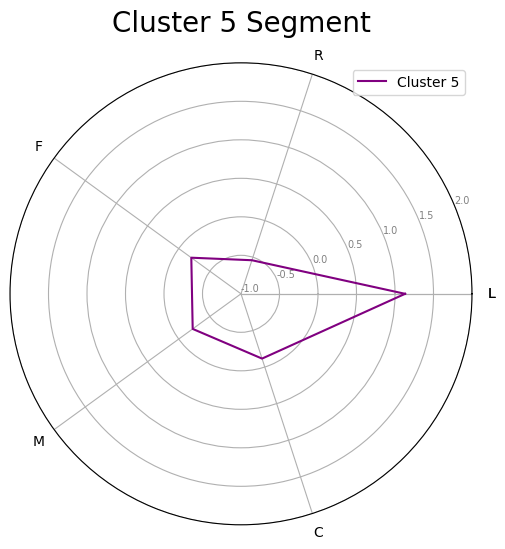

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red', 'purple']
clusters = []

num = []
for cat in category:
    num.append(df_cluster_agg[cat][4])
num.append(df_cluster_agg['L'][4])

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(num))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

plt.plot(label_loc, num, color=color[4], label=f'Cluster 5')

plt.title('Cluster 5 Segment', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1.0,-0.5,0.0,0.5,1.0,1.5,2.0], ["-1.0","-0.5","0.0","0.5","1.0","1.5","2.0"], color="grey", size=7)
plt.legend()
plt.show()

**Observations:**

Cluster 5 has the highest value of L (Length) among the 5 clusters, indicating that customers in cluster 5 are the longest-standing users.

The values of R (Recency), F (Frequency), M (Monetary), and C (Customer Cost) for cluster 5 are average.

**Cluster 5 can be characterized as "Veteran Customers with Occasional Transactions"**

### Clusters Analysis

In [ ]:
df_cluster

,L,R,F,M,C,clusters
0,1.312833,-0.917299,9.153301,13.288942,2.863064,1
1,1.334081,-0.895511,8.796221,12.810088,2.875800,1
2,0.663586,-0.432508,0.797618,12.695925,1.992186,1
3,0.390902,-0.928193,10.010294,14.069733,1.343732,1
4,0.892593,-0.530555,5.725329,13.332522,1.327736,1
...,...,...,...,...,...,...
62954,-0.518043,0.656912,-0.702120,-0.767419,-3.892261,3
62955,-0.001007,-0.476084,-0.559288,-0.436748,-3.892261,0
62956,1.697659,-0.797463,-0.702120,-0.697268,-3.892261,4
62957,-1.259365,1.217963,-0.702120,-0.632883,-3.892261,3


In [ ]:
df_cluster_agg_count = df_cluster.groupby(['clusters']).agg({
                                    'clusters' : ['count']
}).reset_index()
df_cluster_agg_count.columns = ['clusters','count']

In [ ]:
df_cluster_agg_count.T

,0,1,2,3,4
clusters,0,1,2,3,4
count,24332,5390,5186,12328,15723


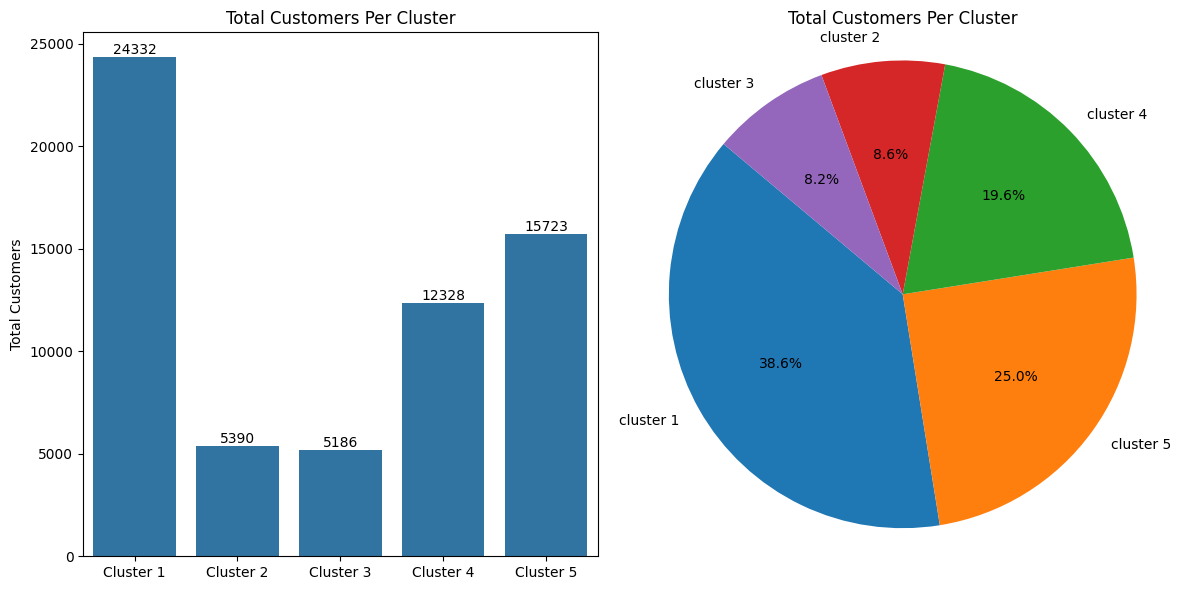

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.countplot(x=df_cluster["clusters"])
ax.bar_label(ax.containers[0])
plt.xticks([0, 1, 2, 3, 4], ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])
plt.title("Total Customers Per Cluster")
plt.xlabel("")
plt.ylabel("Total Customers")

plt.subplot(1, 2, 2)
cluster_counts = df_cluster["clusters"].value_counts()
labels=[f'cluster {cluster_counts.index[0] + 1}',
                                f'cluster {cluster_counts.index[1] + 1}',
                                 f'cluster {cluster_counts.index[2] + 1}',
                                  f'cluster {cluster_counts.index[3] + 1}',
                                   f'cluster {cluster_counts.index[4] + 1}']
plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Total Customers Per Cluster")
plt.axis('equal')

plt.tight_layout()
plt.show()

- **Cluster 1, or "Prospective New Customers"**, has the highest total of **24,332 customers**, **ranking 1st** out of the total number of customers.

- **Cluster 2, or "Loyal Customers"**, has a total of **5,390 customers**, **ranking 4th** out of the total number of customers.

- **Cluster 3, or "Discount Seekers"**, has a total of **5,186 customers**, **ranking 5th** out of the total number of customers.

- **Cluster 4, or "Dormant Customers"**, has a total of **12,328 customers**, **ranking 3rd** out of the total number of customers.

- **Cluster 5, or "Veteran Customers with Occasional Transactions"**, has a total of **15,723 customers**, **ranking 2nd** out of the total number of customers.

# Insights

## Business Strategy Suggestions

1. **Cluster 1, or "Prospective New Customers"**, accounts for 38.6% of the population and represents the majority. Looking at their F (Frequency) and M (Monetary) values, they closely resemble cluster 5 ("Veteran Customers with Occasional Transactions"), indicating that cluster 1 is highly prospective for the company. The company should devise strategies to increase the consumption level of these "Prospective New Customers" (encouraging them to fly more with the airline). This can be achieved by offering more promotions and privileges to new customers, making them feel comfortable and fostering loyalty to the airline.

2. Despite being recent joiners, the consumption level of **cluster 1, or "Prospective New Customers"**, is quite good, as seen from their F (Frequency) and M (Monetary) values. They should be retained to become loyal customers of the company. It's essential to ensure they don't prioritize another airline or stop using this one (Target: R or Recency should be low). The airline may frequently offer membership benefit programs to make customers in cluster 1 feel special or valued, encouraging loyalty to the company.

3. **Cluster 2, or "Loyal Customers"**, occupies the 4th position with 8.6% of the total population. Customers in this segment are significant contributors to this airline company. The company must not lose them. The company can enhance or expand its loyalty program to provide more incentives to loyal customers. This could include special offers or exclusive gifts to strengthen the emotional connection with customers.

4. **Cluster 2, or "Loyal Customers"**, undoubtedly represents customers who are fond of this company. This can be leveraged to expand the company's user base by introducing a referral program. This program can encourage loyal customers to refer their friends and relatives to use the company's services, serving as an effective way to expand the customer base. The company can also provide incentives to referring customers, such as additional discounts or special rewards.

5. **Cluster 3, or "Discount Seekers"**, consists of customers with high values of C (Customer Cost) but relatively low values of F (Frequency) and M (Monetary). From these characteristics, the company can consider implementing a progressive discount system for customers in cluster 3. Progressive discounts could be based on purchase frequency or accumulation based on flight miles. This is expected to increase the shopping value of customers in cluster 3 and reduce dependence on shopping solely based on discounts.

6. The company can also implement a discount system based on bundling for **Cluster 3, or "Discount Seekers"**. Discounts are only provided if customers purchase bundled flight tickets (Round Trip), or discounts can also be given for ticket upgrades from regular to business/first class. This approach can increase the transaction value of customers in this cluster.

7. **Cluster 4, or "Dormant Customers"**, consists of customers with high values of R (Recency). Customers in this cluster have not used the airline's services for a long time, or have even uninstalled the airline's app for ticket purchases. The company may consider offering "welcome back" discounts or other benefits to this cluster. In addition to offering discounts, the information about discounts must reach the customers. Channels that can be used to send discount informations to this cluster include social media, email, SMS, or pop-up messages (useful if the customer has not uninstalled the app).

8. **Cluster 5, or "Veteran Customers with Occasional Transactions"**, comprises customers with high values of L (Length) but average values of R (Recency), F (Frequency), and M (Monetary). For cluster 5, a deeper analysis can be conducted regarding the months when customers in this cluster make ticket bookings. Once the booking pattern is understood, the company can consider offering discounts or special membership benefits during months outside their usual booking pattern. This is done to encourage customers in cluster 5 to increase their consumption beyond their usual habits. This can provide significant benefits to the company, as this cluster accounts for 25% of the total population.